# Raumluftqualität 5.0

Für einen belüfteten Raum ist

$$
  k(t) = k_\infty + (k_0-k_\infty)\,\rm{e}^{-\beta\,t}
$$

Dieser exponentielle Verlauf nähert sich dem Wert $k_\infty$ immer stärker an, kann ihn theoretisch aber nicht erreichen. Das hat seinen Grund darin, dass die Exponentialfunktion (theoretisch) niemals den Wert 0 annehmen kann.

Beispiel: für $k_0=400\,\rm ppM$, $k_\infty=1000\,\rm ppM$, $\beta = 0.5$ und $t_0=0$ ergibt sich:

![Verlauf der CO_2-Konzentration](Nb_5_fig_1.png)

Die Luftwechselzahl ist $\beta = 0.5\,\rm\dfrac{1}{h}$. Der Kehrwert dieser Zahl wird als Zeitkonstante bezeichnet, es ist

$$
  t_\rm{k} = \dfrac{1}{\beta} = 2\,\rm{h}
$$

Wird die Zeitkonstante $t_\rm{k}$ in die Funktion $k(t)$ eingesetzt, so ergibt sich

$$
  k(t_\rm{k}) = k_\infty + (k_0-k_\infty)\,\rm{e}^{-1}
$$

Entsprechend ergibt sich nach $2, 3, \ldots n$ Zeitkonstanten:

$$
  k(n\,t_\rm{k}) = k_\infty + (k_0-k_\infty)\,\rm{e}^{-n}
$$

Hierfür schreibt man auch

$$
  \dfrac{k(n\,t_\rm{k}) -k_\infty}{k_0-k_\infty} = \rm{e}^{-n}
$$

Nach einer Zeitkonstanten ist die Differenz $k(t) -k_\infty$ auf den Wert $\frac{1}{e}\approx 0.368 = 36.8\%$ abgesunken.

Nach drei Zeitkonstanten sind es noch etwa $5\,\%$ und nach fünf Zeitkonstanten etwa 6.74 Promille.

In [1]:
from sympy import *
init_printing()

from matplotlib import pyplot as plt, ticker as tk
%config InlineBackend.figure_format='retina' # nur für Macbook Pro nötig

import numpy as np
import pandas as pd

from fun_expr import Function_from_Expression as FE

In [2]:
# Die Funktionsvariable definieren
t = Symbol('t')

# bekannte Konstanten
k_zul = 1000e-6
k_0 = k_au = 400e-6

beta = 0.5
t_0 = 0

# Die Funktion k(t) definieren
k = FE(t, k_zul + (k_0-k_zul)*exp(-beta*(t-t_0)),name='k')
k.equation()

<IPython.core.display.Math object>

In [3]:
lt = np.linspace(0,10) # 10 Stunden

df = pd.DataFrame(
    {
        't': lt,
        'k': 1e6*k.lambdified(lt), # k in ppM
    }
)

df.head().T

,0,1,2,3,4
t,0.0,0.204082,0.408163,0.612245,0.816327
k,400.0,458.204384,510.762517,558.222127,601.077808


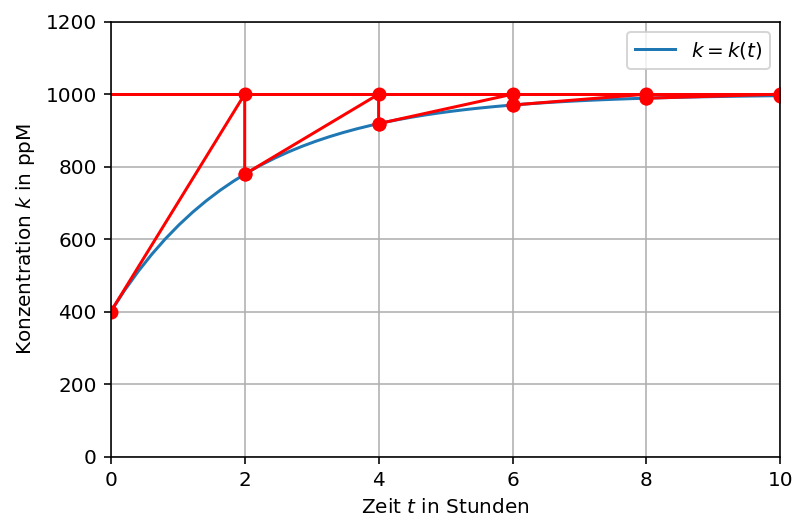

In [4]:
ax = df.plot(x='t',y='k',label='$k=k(t)$')
ax.axhline(1e6*k_zul,c='r')

ax.set(
    xlim=(0,10),xlabel='Zeit $t$ in Stunden',
    ylim=(0,1200),ylabel='Konzentration $k$ in ppM'
)

delta_t = 2 # 1/beta = 2
for i in range(0,10,delta_t):
    ax.plot([i,i+delta_t,i+delta_t],[1e6*v for v in [k(i),k_zul,k(i+delta_t)]],c='r',marker='o')

ax.grid();
plt.savefig('Nb_5_fig_1.pdf',bbox_inches='tight')